In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk


In [334]:
df = pd.read_csv('jobs_data_cleaned.csv')

In [335]:
df.head()

,Job-Titel,Stellenbeschreibung,Bewertung,Firmenname,Ort,Hauptsitz,Firmengröße,Gegründet,Rechtsform,Branche,...,job_country,job_city,job_at_hq,company_age,python_yn,R_yn,spark,aws,excel,Sql
0,Data Scientist,What to expect\n\nWe are looking for an experi...,4.1,Brainlab\n4.1,München,"München, Germany",1.001 bis 5.000 Mitarbeiter,1989,Privatunternehmen,Dienstleistungen im Gesundheitswesen & Kranken...,...,Germany,München,1,31,1,0,0,0,0,0
1,Data Scientist,"Data Scientist\n\nBerlin, asap\n\nHeadquartere...",3.3,Mapp Digital\n3.3,Berlin,"San Diego, CA",201 bis 500 Mitarbeiter,2016,Privatunternehmen,Unternehmenssoftware & Netzwerklösungen,...,CA,San Diego,0,4,1,0,0,0,0,1
2,Data Scientist,Job Overview\n\n\nWargaming is looking to brin...,3.8,Wargaming CIS\n3.8,Berlin,"Nicosia, Cyprus",1.001 bis 5.000 Mitarbeiter,1998,Privatunternehmen,Videospiele,...,Cyprus,Nicosia,0,22,1,0,0,0,0,1
3,Data Scientist,"REE is redefining how mobility is designed, fr...",5.0,REE\n5.0,"Germany, DE","Tel Aviv-Yafo, Israel",51 bis 200 Mitarbeiter,2018,Privatunternehmen,Automobilindustrie,...,Israel,Tel Aviv-Yafo,0,2,1,0,0,0,0,0
4,Data Scientist,Im hiring a Data Scientist for a Computer Visi...,5.0,Alldus\n5.0,Berlin,"Dublin, Ireland",1 bis 50 Mitarbeiter,-1,Privatunternehmen,-1,...,Ireland,Dublin,0,-1,1,0,0,0,0,0


In [336]:
df.columns

Index(['Job-Titel', 'Stellenbeschreibung', 'Bewertung', 'Firmenname', 'Ort',
       'Hauptsitz', 'Firmengröße', 'Gegründet', 'Rechtsform', 'Branche',
       'Industriezweig', 'Umsatz', 'Konkurrenten', 'firmenname_txt',
       'job_country', 'job_city', 'job_at_hq', 'company_age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql'],
      dtype='object')

In [337]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower() or 'Machine Learning Engineer' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
##Job title and seniority
##Job description and length
##Competitor count
##Remove new line from job title

In [338]:
df['job_simp'] = df['Stellenbeschreibung'].apply(title_simplifier)

In [339]:
df.job_simp.value_counts()

data scientist    237
mle                60
na                 55
data engineer       7
analyst             3
manager             2
Name: job_simp, dtype: int64

In [340]:
##Job description length
df['desc_len'] = df['Stellenbeschreibung'].apply(lambda x: len(x))
df['desc_len']

0       2227
1       3251
2       2647
3       1485
4       1195
5       1411
6       4207
7        532
8       2163
9       1152
10      2275
11      3031
12      2231
13      1888
14      2339
15      3687
16      1713
17      6015
18      1705
19      2900
20      2923
21      2351
22      1169
23      1820
24      3192
25      2963
26      2548
27      4887
28      3509
29      4887
30      5204
31       773
32      4271
33      4127
34      3839
35      2693
36      2355
37      3074
38      3133
39      6374
40      3252
41      2811
42      2295
43      4063
44      5407
45      2454
46      5157
47      2705
48      2802
49      6443
50      3849
51      2619
52       523
53      3021
54      2515
55      2371
56      2261
57      2629
58      3040
59      1946
60      2564
61      2985
62      3682
63      2645
64      3405
65      1759
66      3047
67      2355
68      1057
69      1679
70      2913
71      1013
72       700
73      2469
74      4138
75      3197
76      2256

In [341]:
##Competitor count
df['num_konkurrenten'] = df['Konkurrenten'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [342]:
df['Konkurrenten']

0                                                     -1
1                                                     -1
2                                                     -1
3                                                     -1
4                                                     -1
5                                                     -1
6                                                     -1
7                                                     -1
8                                                     -1
9                                                     -1
10                                                    -1
11                                                    -1
12                                                    -1
13                                                    -1
14                                                    -1
15                                                    -1
16                                                    -1
17                             

In [343]:
df['firmenname_txt']= df.firmenname_txt.apply(lambda x: x.replace('\n', ''))

In [344]:
df['firmenname_txt']

0                                               Brainlab
1                                           Mapp Digital
2                                          Wargaming CIS
3                                                    REE
4                                                 Alldus
5                                HMS Analytical Software
6                     ORAYLIS GmbH Business Intelligence
7                                         Quantum Brains
8                                       JUST ADD AI GmbH
9                                     Red Experts in SAP
10                                          Codepan GmbH
11                                             JetBrains
12                                  Trakken Web Services
13                                            Flint Data
14                                                 Reply
15                                             Railsbank
16                                           BioNTech AG
17                             

In [345]:
df.describe()

,Bewertung,Gegründet,job_at_hq,company_age,python_yn,R_yn,spark,aws,excel,Sql,desc_len,num_konkurrenten
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.010440,1275.041209,0.368132,33.925824,0.807692,0.002747,0.244505,0.107143,0.142857,0.450549,3027.054945,0.420330
std,1.898281,942.043065,0.482961,50.399642,0.394656,0.052414,0.430385,0.309721,0.350409,0.498233,1351.414638,1.063662
min,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
25%,3.100000,-1.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2256.750000,0.000000
50%,3.700000,1932.000000,0.000000,11.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2857.500000,0.000000
75%,4.100000,1999.000000,1.000000,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3538.500000,0.000000
max,5.000000,2019.000000,1.000000,352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13228.000000,6.000000


In [346]:
df.columns

Index(['Job-Titel', 'Stellenbeschreibung', 'Bewertung', 'Firmenname', 'Ort',
       'Hauptsitz', 'Firmengröße', 'Gegründet', 'Rechtsform', 'Branche',
       'Industriezweig', 'Umsatz', 'Konkurrenten', 'firmenname_txt',
       'job_country', 'job_city', 'job_at_hq', 'company_age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql', 'job_simp', 'desc_len',
       'num_konkurrenten'],
      dtype='object')

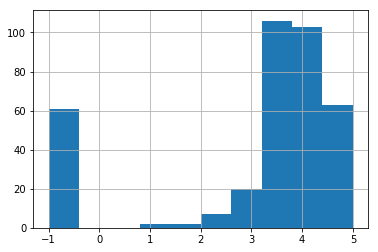

In [347]:
df.Bewertung.hist()

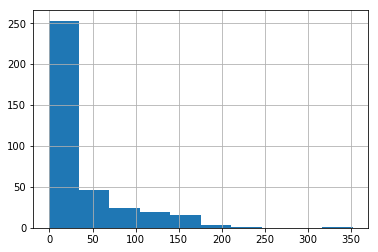

In [348]:
df.company_age.hist()

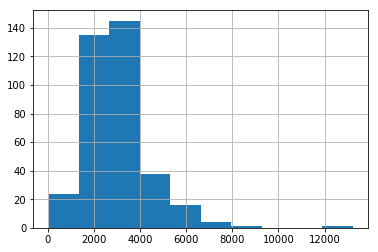

In [349]:
df.desc_len.hist()

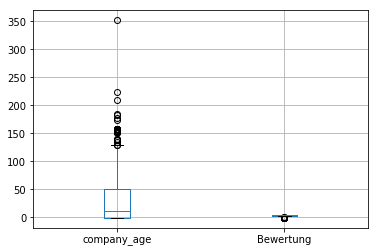

In [350]:
df.boxplot(column = ['company_age', 'Bewertung'])

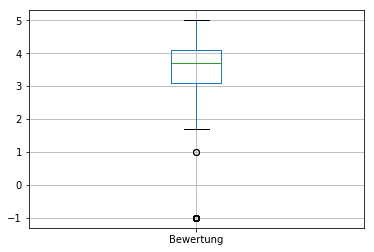

In [351]:
df.boxplot(column = ['Bewertung'])

In [352]:
df[['company_age','Bewertung','desc_len']].corr()

,company_age,Bewertung,desc_len
company_age,1.000000,0.280786,0.171709
Bewertung,0.280786,1.000000,0.143913
desc_len,0.171709,0.143913,1.000000


In [353]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['company_age','Bewertung','desc_len', 'num_konkurrenten']].corr(), vmax = 3, center = 0, cmap = cmap,
           square= True, linewidths=.5, cbar_kws={"shrink": .5})

TypeError: 'float' object cannot be interpreted as an integer

In [354]:
df.columns

Index(['Job-Titel', 'Stellenbeschreibung', 'Bewertung', 'Firmenname', 'Ort',
       'Hauptsitz', 'Firmengröße', 'Gegründet', 'Rechtsform', 'Branche',
       'Industriezweig', 'Umsatz', 'Konkurrenten', 'firmenname_txt',
       'job_country', 'job_city', 'job_at_hq', 'company_age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql', 'job_simp', 'desc_len',
       'num_konkurrenten'],
      dtype='object')

In [355]:
df_cat = df[['Ort', 'Hauptsitz', 'Firmengröße', 'Rechtsform', 'Branche', 'Industriezweig', 'Umsatz', 'firmenname_txt', 'job_country', 'job_at_hq', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql', 'job_simp', 'seniority']]

KeyError: "['seniority'] not in index"

In [356]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()


NameError: name 'df_cat' is not defined

In [357]:
for i in df_cat[['Ort','Hauptsitz','firmenname_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

NameError: name 'df_cat' is not defined

In [358]:
df.columns

Index(['Job-Titel', 'Stellenbeschreibung', 'Bewertung', 'Firmenname', 'Ort',
       'Hauptsitz', 'Firmengröße', 'Gegründet', 'Rechtsform', 'Branche',
       'Industriezweig', 'Umsatz', 'Konkurrenten', 'firmenname_txt',
       'job_country', 'job_city', 'job_at_hq', 'company_age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql', 'job_simp', 'desc_len',
       'num_konkurrenten'],
      dtype='object')

In [359]:
pd.pivot_table(df, index = 'job_simp', values = 'Bewertung')

,Bewertung
job_simp,
analyst,2.466667
data engineer,3.285714
data scientist,2.996203
manager,4.000000
mle,2.963333
na,3.081818


In [360]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'Bewertung')

KeyError: 'seniority'

In [361]:
pd.pivot_table(df, index = 'job_city', values = 'Bewertung').sort_values('Bewertung', ascending = False)

,Bewertung
job_city,
Cordoba,5.000000
Rheine,5.000000
Helsinki,5.000000
Langen (Hessen),5.000000
Wurzburg,5.000000
Frederiksberg,5.000000
Tel Aviv-Yafo,5.000000
Ettlingen,5.000000
Tubingen,5.000000


In [362]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [363]:
pd.pivot_table(df, index = ['job_city','job_simp'], values = 'Bewertung', aggfunc = 'count').sort_values('job_city', ascending = False)

Bewertung
job_city                  job_simp                 
Zirndorf                  mle                     1
Würzburg                  data scientist          2
Wurzburg                  data scientist          1
Worthington               data scientist          1
Winooski                  data scientist          1
Wimsheim                  na                      1
Willich                   na                      1
                          data scientist          2
West Chester              data scientist          2
Washington                mle                     1
Waldsassen                na                      1
Unterpremstatten-Zettling mle                     1
Tysons                    data scientist          1
Turin                     mle                     1
                          data scientist          1
Tubingen                  na                      1
Tel Aviv-Yafo             data scientist          1
Teaneck                   data scientist          1
Stuttgart                 na                      2
                          mle                     1
                          data scientist          7
Shenzhen                  data scientist          1
Seattle                   data scientist          1
Schöneck/Vogtl.           na                      1
Schwentinental            data scientist          1
Schaffhausen              na                      1
Sao Paulo                 data scientist          8
San Jose                  mle                     1
San Francisco             data scientist          1
San Diego                 data scientist          1
Saarbrücken               data scientist          1
Rostock                   data scientist          1
Rosengarten               data scientist          1
Rheinstetten              na                      1
Rheine                    na                      1
Prague                    data scientist          1
Potsdam                   mle                     1
                          data scientist          1
Pleasanton                data scientist          1
Pforzheim                 data scientist          1
Paris                     na                      1
                          data scientist          2
PUTEAUX                   na                      1
Overath                   na                      1
Ottobrunn                 mle                     2
                          na                      1
Oldenburg (Oldenburg)     data scientist          1
Oldenburg                 data scientist          2
Offenburg                 data scientist          1
Nuremberg                 data scientist          1
                          data engineer           2
Northville                mle                     2
North Chicago             data scientist          1
Nicosia                   data scientist          1
Newtown                   data scientist          1
Newbury                   data scientist          2
New York                  na                      1
                          data scientist          5
Neubiberg                 na                      1
Neckarsulm                mle                     1
                          data scientist          2
                          na                      1
Nashville                 data scientist          3
Münster                   data scientist          2
München (Deutschland)     data scientist          1
                          data engineer           1
München                   na                      2
                          data scientist          4
Munich                    analyst                 1
                          na                      2
                          mle                     8
                          data scientist         12
Montreal                  data scientist          1
Montabaur                 data engineer           1
                          na                      3
Milano                    data scienti

In [364]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_city', values = 'Bewertung').sort_values('Bewertung', ascending = False)

,Bewertung
job_city,
Tel Aviv-Yafo,5.000000
Wurzburg,5.000000
Langen (Hessen),5.000000
Frederiksberg,5.000000
Cordoba,5.000000
Karlsruhe,5.000000
Helsinki,5.000000
Düsseldorf,4.900000
Potsdam,4.900000


In [365]:
df.columns

Index(['Job-Titel', 'Stellenbeschreibung', 'Bewertung', 'Firmenname', 'Ort',
       'Hauptsitz', 'Firmengröße', 'Gegründet', 'Rechtsform', 'Branche',
       'Industriezweig', 'Umsatz', 'Konkurrenten', 'firmenname_txt',
       'job_country', 'job_city', 'job_at_hq', 'company_age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'Sql', 'job_simp', 'desc_len',
       'num_konkurrenten'],
      dtype='object')

In [366]:
# Bewertung, Industriezweig, Branche, num_konkurrenten, python_yn, R_yn, spark, aws, excel, Sql, desc_len, Rechtsform

In [367]:
df_pivots = df[['Bewertung', 'Industriezweig', 'Branche', 'Umsatz','num_konkurrenten', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Sql', 'desc_len', 'Rechtsform', 'company_age']]

In [368]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'company_age').sort_values('company_age', ascending = False))

Bewertung
           company_age
Bewertung             
 2.5         91.000000
 4.3         84.000000
 4.4         71.166667
 3.7         69.041667
 4.0         68.838710
 4.1         54.904762
 3.8         52.214286
 3.4         49.657143
 3.3         40.083333
 3.6         33.333333
 3.9         33.181818
 4.6         33.166667
 2.7         30.000000
 4.2         29.444444
 3.5         28.769231
 2.8         22.000000
 3.1         17.000000
 4.9         15.500000
 3.2         15.428571
 2.4         14.000000
 2.0         12.000000
 3.0         11.428571
 4.7          8.200000
 5.0          7.050000
 2.2          7.000000
 4.5          5.562500
-1.0          0.540984
 4.8          0.500000
 1.0         -1.000000
 2.9         -1.000000
 2.3         -1.000000
 1.8         -1.000000
 1.7         -1.000000
Industriezweig
                                        company_age
Industriezweig                                     
Biotechnologie & Pharmaindustrie         131.764706
Bildungswesen 

ValueError: Grouper for 'company_age' not 1-dimensional

In [369]:
pd.pivot_table(df_pivots, index = 'Umsatz', columns = 'python_yn', values = 'Bewertung', aggfunc = 'count')

python_yn,0,1
Umsatz,,
1 bis 2 Milliarden € (EUR),1.0,16.0
1 bis 5 Millionen € (EUR),1.0,10.0
10 bis 25 Millionen € (EUR),2.0,10.0
100 bis 500 Millionen € (EUR),5.0,19.0
2 bis 5 Milliarden € (EUR),7.0,18.0
25 bis 50 Millionen € (EUR),2.0,7.0
5 bis 10 Milliarden € (EUR),6.0,48.0
5 bis 10 Millionen € (EUR),NaN,4.0
50 bis 100 Millionen € (EUR),6.0,9.0


In [372]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

words = " ".join(df['Stellenbeschreibung'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stoplist = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stoplist and w.isalpha():
            filtered.append(w.lower())
    return filtered
    
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])


wc = WordCloud(background_color = "white", random_state = 1, stopwords = stopwords, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable